During the local regression procedure:
After iteration 1: 2 (0.00%) outlier(s) detected
After iteration 2: 2 (0.00%) outlier(s) detected
Converged.



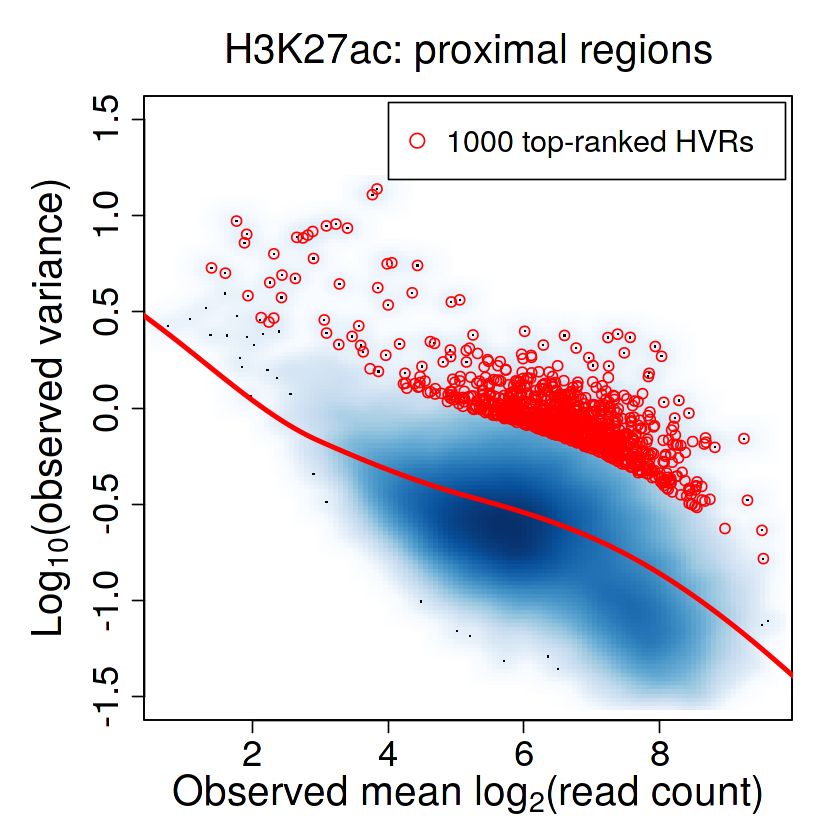

In [7]:
#import MAnorm2 packages
library(MAnorm2)
library(statmod)
library(scales)
library(RColorBrewer)
library(edgeR)
library(preprocessCore)
library(extrafont)

#calculate single end p-value
single.end.pvalue<-function(biocond){
    df<-attr(biocond,"df")
    p.value<-pf(biocond$fold.change,df[1],df[2],lower.tail=F)
    return(p.value)
}

num.of.peaks<-1000

#-------------------------------------------------------------------
#Figure1A
#-------------------------------------------------------------------

#read in count table
path<-'/media/chenhaojie/shao_lab_Disk02/Data_set_used_in_MAnorm2_and_HyperChIP/Hyper_variable_peaks/New/5kb/H3K27ac/proximal_peaks_5kb.txt'
reads_count<-c(4:39)
occupancy<-c(40:75)

raw_reads_count<-read.table(path,header=T,sep='\t')
normalized.data<-MAnorm2::normalize(raw_reads_count,reads_count,occupancy,offset=0.5,
                                    baseline='pseudo-reference')

biocond<-bioCond(normalized.data[reads_count],
                 normalized.data[occupancy],
                 occupy.num=1,name='Tumor')

biocond$occupancy<-c(biocond$sample.mean<=quantile(biocond$sample.mean,0.1))

conds.list<-list(biocond)

method<-'loc'
conds.list.fit<-fitMeanVarCurve(conds.list,method=method,occupy.only=F,args.lp=list(nn=1.0))

conds.fit.var<-varTestBioCond(conds.list.fit[[1]])
p.values<-single.end.pvalue(conds.fit.var)

fdrs1<-p.adjust(p.values,method='fdr')
fdrs2<-p.adjust(1-p.values,method='fdr')

result<-cbind(normalized.data,conds.fit.var,p.values,fdrs1,fdrs2)

par(mar=c(5,6,4,2),cex.main=1,font.main=1)
smoothScatter(conds.list.fit[[1]]$sample.mean,log10(conds.list.fit[[1]]$sample.var),
              xlab=expression(paste('Observed mean ',log[2],'(read count)')),ylab=expression(paste(Log[10],'(observed variance)')),
              main='H3K27ac: proximal regions',cex.main=2,cex.lab=2,cex.axis=1.8,
              ylim=c(-1.5,1.5))

lines(seq(0,10,0.1),log10(conds.list.fit[[1]]$fit.info$predict(seq(0,10,0.1))),lwd=3,col='red')

points(conds.fit.var$observed.mean[c(rank(p.values)<num.of.peaks)],
       log10(conds.fit.var$observed.var)[c(rank(p.values)<num.of.peaks)],col='red')


legend('topright',c('1000 top-ranked HVRs'),
       inset=0.01,
       pch=21,
       col=c('red'),cex=1.5)



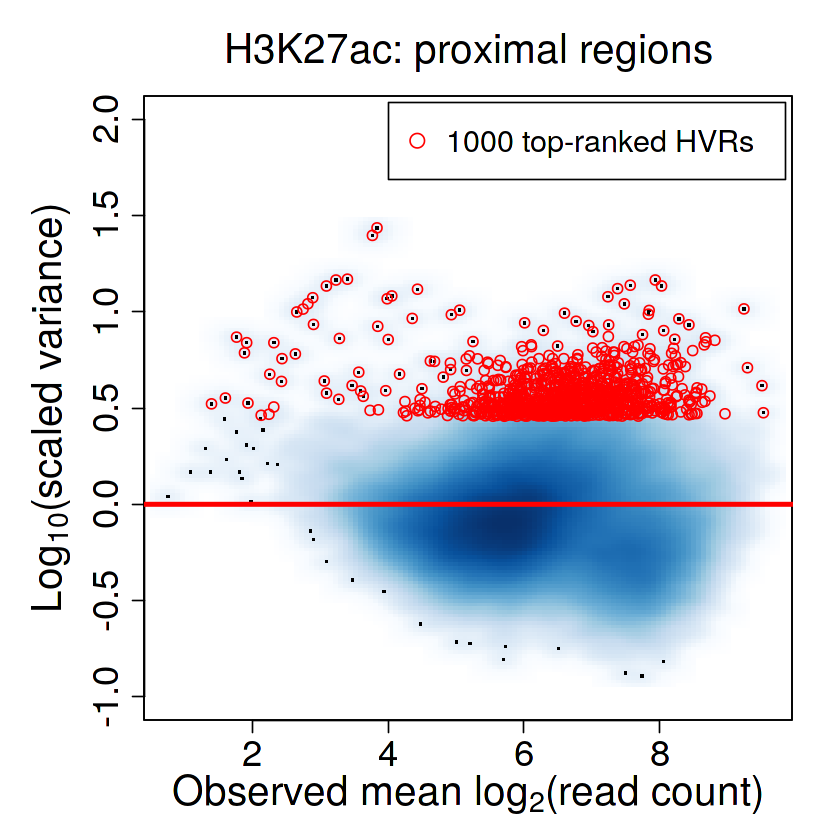

In [8]:
par(mar=c(5,6,4,2),cex.main=1,font.main=1)
smoothScatter(conds.fit.var$observed.mean,
              log10(conds.fit.var$fold.change*conds.list.fit[[1]]$fit.info$ratio.var),
              xlab=expression(paste('Observed mean ',log[2],'(read count)')),ylab=expression(paste(Log[10],"(scaled variance)")),
              cex.lab=2,cex=2,cex.axis=1.8,
              main='H3K27ac: proximal regions',cex.main=2,ylim=c(-1,2))


lines(c(0,10),c(0,0),col='red',lwd=3)

points(conds.fit.var$observed.mean[c(rank(p.values)<num.of.peaks)],
       log10(conds.fit.var$fold.change*conds.list.fit[[1]]$fit.info$ratio.var)[c(rank(p.values)<num.of.peaks)],col='red')

legend('topright',c('1000 top-ranked HVRs'),
       inset=0.01,
       pch=21,
       col=c('red'),cex=1.5)

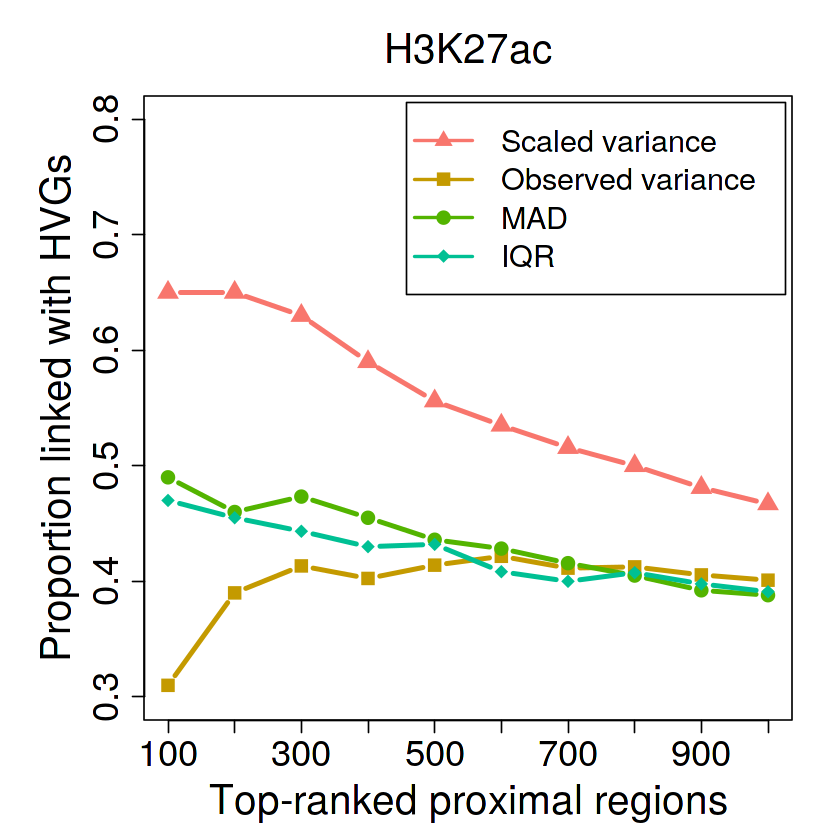

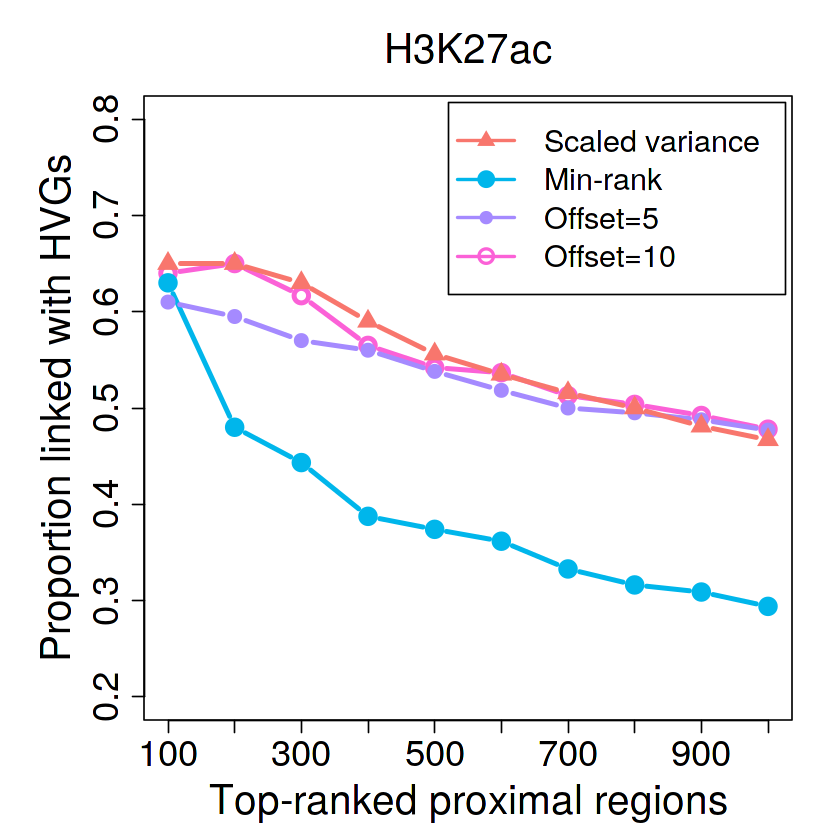

In [10]:
library(RColorBrewer)
library(scales)
color.list<-hue_pal()(7)

data<-read.table('/media/chenhaojie/shao_lab_Disk02/Data_set_used_in_MAnorm2_and_HyperChIP/Hyper_variable_peaks/New/LUAD_H3K27ac_ChIP_seq_data_set/result.txt',sep='\t',header=T,row.names=1)

#-------------------------------------------------------------------
#Figure1C and D
#-------------------------------------------------------------------

par(mar=c(5,6,4,2),cex.main=1,font.main=1)

plot(c(1:10),data['loc10',],type='b',col=color.list[1],lwd=3,pch=c(17),
     ylab='Proportion linked with HVGs',
     xlab='Top-ranked proximal regions',
     main='H3K27ac',
     xaxt='n',
     #yaxt='n',
     ylim=c(0.3,0.8),cex.lab=2,cex.main=2,cex=1.8,cex.axis=1.8)

axis(side=1,at=c(1:10),
            labels=c(100,200,300,400,500,600,700,800,900,1000),cex.axis=1.8)

lines(c(1:10),data['var',],type='b',col=color.list[2],lwd=3,pch=c(15),cex=1.5)
lines(c(1:10),data['mad',],type='b',col=color.list[3],lwd=3,pch=c(16),cex=1.5)
lines(c(1:10),data['IQR',],type='b',col=color.list[4],lwd=3,pch=c(18),cex=1.5)

legend('topright',c('Scaled variance',
                    'Observed variance',
                    'MAD',
                    'IQR'),lty=1,lwd=2,
       inset=0.01,
       pch=c(17,15,16,18),
       col=color.list[c(1,2,3,4)],cex=1.5)



data<-read.table('/media/chenhaojie/shao_lab_Disk02/Data_set_used_in_MAnorm2_and_HyperChIP/Hyper_variable_peaks/New/LUAD_H3K27ac_ChIP_seq_data_set/result.txt',sep='\t',header=T,row.names=1)

par(mar=c(5,6,4,2),cex.main=1,font.main=1)

plot(c(1:10),data['offset10',],type='b',col=color.list[7],lwd=3,pch=c(21),
     ylab='Proportion linked with HVGs',
     xlab='Top-ranked proximal regions',
     main='H3K27ac',
     xaxt='n',
     ylim=c(0.2,0.8),cex.lab=2,cex.main=2,cex=1.5,cex.axis=1.8)

axis(side=1,at=c(1:10),
            labels=c(100,200,300,400,500,600,700,800,900,1000),cex.axis=1.8)

lines(c(1:10),data['min.rank',],type='b',col=color.list[5],lwd=3,pch=c(19),cex=1.5)
lines(c(1:10),data['offset5',],type='b',col=color.list[6],lwd=3,pch=c(20),cex=1.5)
lines(c(1:10),data['loc10',],type='b',col=color.list[1],lwd=3,pch=c(17),cex=1.8)


legend('topright',c('Scaled variance',
                    'Min-rank',
                    'Offset=5',
                    'Offset=10'),lty=1,lwd=2,
       inset=0.01,
       pch=c(17,19,20,21),
       col=color.list[c(1,5,6,7)],cex=1.5)
